In [213]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from lib import *
from svm import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [123]:
# visualize data
# e.g. visualize(train_data[1266, :], train_lable[1266])
def visualize(data, lable = None):
    data_x = data[::2]
    data_y = data[1::2]
    plt.plot(data_x, data_y)
    if lable != None:
        print "Number is : ", lable

In [136]:
data, lable  = load_train()
train_data, train_lable, validation_data, validation_lable = shuffleData(data, lable)
print "train data: ", train_data.shape
print "train lable: ", train_lable.shape

train data:  (3000L, 16L)
train lable:  (3000L,)


In [125]:
train_lable[train_lable <= 4 ] = -1
train_lable[train_lable > 4] = 1
validation_lable[validation_lable <= 4 ] = -1
validation_lable[validation_lable > 4] = 1

In [127]:
alpha, b = SMO(2, 1e-5, validation_data, validation_lable, train_data, train_lable, max_passes = 3, kernel=kernel_gaussian, max_iter =3)
alpha.max()

now ir = 1; Train Correct = 0.47533333333333333; Validation Correct = 0.5281501340482574
now ir = 2; Train Correct = 0.9403333333333334; Validation Correct = 0.9450402144772118
now ir = 3; Train Correct = 0.982; Validation Correct = 0.9691689008042895


2.0

In [135]:
train_data[train_lable == 1].shape

(1426L, 16L)

In [214]:
train_0va(train_data, train_lable, max_passes=3, kernel=kernel_gaussian, max_iter=3)

Now doing number: 0, there is 308 of them
now ir = 1; Train Correct = 0.10266666666666667; 
now ir = 2; Train Correct = 0.9913333333333333; 
now ir = 3; Train Correct = 0.9903333333333333; 
Now doing number: 1, there is 318 of them
now ir = 1; Train Correct = 0.106; 
now ir = 2; Train Correct = 0.9496666666666667; 
now ir = 3; Train Correct = 0.9983333333333333; 
Now doing number: 2, there is 315 of them
now ir = 1; Train Correct = 0.105; 
now ir = 2; Train Correct = 0.869; 
now ir = 3; Train Correct = 0.9533333333333334; 
Now doing number: 3, there is 285 of them
now ir = 1; Train Correct = 0.095; 
now ir = 2; Train Correct = 0.9926666666666667; 
now ir = 3; Train Correct = 0.956; 
Now doing number: 4, there is 316 of them
now ir = 1; Train Correct = 0.10533333333333333; 
now ir = 2; Train Correct = 0.9926666666666667; 
now ir = 3; Train Correct = 0.98; 
Now doing number: 5, there is 290 of them
now ir = 1; Train Correct = 0.09666666666666666; 
now ir = 2; Train Correct = 0.9316666666

([array([-1., -1.,  1., ..., -1., -1., -1.]),
  array([-1., -1., -1., ..., -1., -1., -1.]),
  array([-1.,  1., -1., ..., -1., -1.,  1.]),
  array([-1., -1., -1., ..., -1., -1., -1.]),
  array([-1., -1., -1., ...,  1., -1., -1.]),
  array([-1., -1., -1., ..., -1.,  1., -1.]),
  array([-1., -1., -1., ..., -1., -1., -1.]),
  array([ 1., -1., -1., ..., -1., -1., -1.]),
  array([-1., -1., -1., ..., -1., -1., -1.]),
  array([-1., -1., -1., ..., -1., -1., -1.])],
 [array([ 0.        ,  0.        ,  1.00000102, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.03368526]),
  array([ 0.01240757,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
  array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
  array([ 0.19101766,  0.        ,  0.        , ...,  0.        ,
          0.1383972 ,  0.        ]),
  array([ 0.        ,  0.        , 

Number is :  6.0
predict:  6


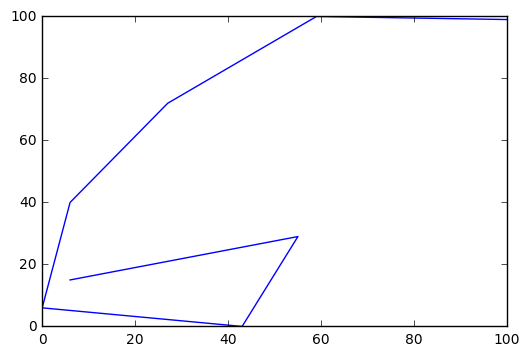

In [215]:
# example visual test
num = 40
visualize(validation_data[num,:],validation_lable[num] )
number = number_predict(validation_data[num,:], train_data, train_lable_num, alpha_num, b_num, kernel_gaussian)
print "predict: ", number


In [217]:
# final result
validation_correct_rate(validation_data, validation_lable, train_data, train_lable_num, alpha_num, b_num, kernel_gaussian)

0.9839142091152815

In [183]:
# using lib svm main
clf = svm.SVC()
clf.fit(train_data, train_lable)
trainErr = []
validationErr = []
for i in range (1):
    # svm main
    ir = 5 * i 
    print "iter: ", ir
    clf = svm.SVC(max_iter=100)
    clf.fit(train_data, train_lable)
    terror = test(train_data, train_lable, clf)
    print "test correcr rate: ",terror
    trainErr.append(terror)
    verror = test(validation_data, validation_lable, clf)
    print "validation correcr rate: ",verror
    validationErr.append(verror)
#plt.plot(trainErr)
#plt.plot(validationErr)
sample = train_data[1200,:]
visualize(sample)
sample= sample.reshape(1, -1)
print sample.shape
print clf.predict(sample)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)